In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

#1 DATA collection

In [57]:
now = datetime.now()
start=datetime(now.year-10,now.month,now.day)
end=now
ticker='AAPL'
df = yf.download(ticker,start, end)
df.reset_index()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-12-28,24.084593,24.280751,23.940293,24.258203,106816800
1,2015-12-29,24.517496,24.673070,24.093615,24.116162,123724800
2,2015-12-30,24.197327,24.508473,24.165761,24.481418,100855200
3,2015-12-31,23.732862,24.131942,23.633656,24.127433,163649200
4,2016-01-04,23.753162,23.757673,22.997841,23.135378,270597600
...,...,...,...,...,...,...
2509,2025-12-18,272.190002,273.630005,266.950012,273.609985,51630700
2510,2025-12-19,273.670013,274.600006,269.899994,272.149994,144632000
2511,2025-12-22,270.970001,273.880005,270.510010,272.859985,36571800


In [58]:
df.shape


(2514, 5)

In [59]:
df.dtypes
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

Text(0, 0.5, 'close price')

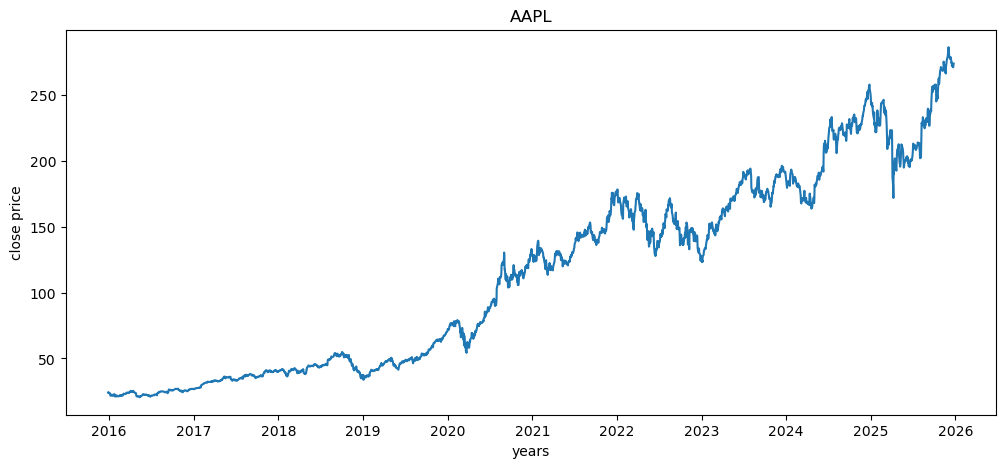

In [60]:
n=plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel("years")
plt.ylabel('close price')

feature engineering

In [61]:
temp_data = [10, 15, 20, 18, 30, 22, 25, 32, 35, 38]
print(sum(temp_data[1:6])/5)
df1 = pd.DataFrame([10, 15, 20, 18, 30, 22, 25, 32, 35, 38])
df1

21.0


,0
0,10
1,15
2,20
3,18
4,30
5,22
6,25
7,32
8,35
9,38


In [62]:
# df1['MA_5'] = df1.rolling(5).mean() # moving average with the window size of 5
df['MA_100'] = df.Close.rolling(100).mean()
df['MA_100'].head(103)

Date
2015-12-28          NaN
2015-12-29          NaN
2015-12-30          NaN
2015-12-31          NaN
2016-01-04          NaN
                ...    
2016-05-18          NaN
2016-05-19    22.772533
2016-05-20    22.748858
2016-05-23    22.723614
2016-05-24    22.704923
Name: MA_100, Length: 103, dtype: float64

Text(0.5, 1.0, '100 Days Moving Average')

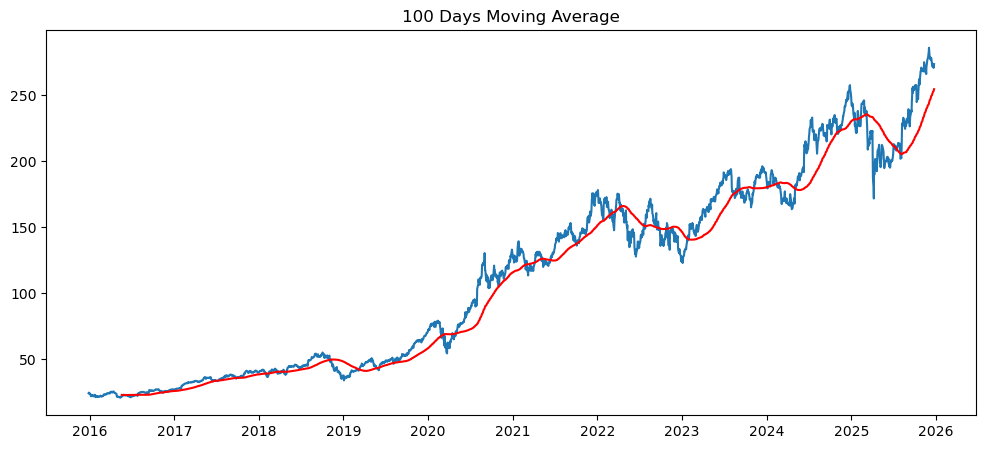

In [63]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r') # 'r' for red color
plt.title('100 Days Moving Average')

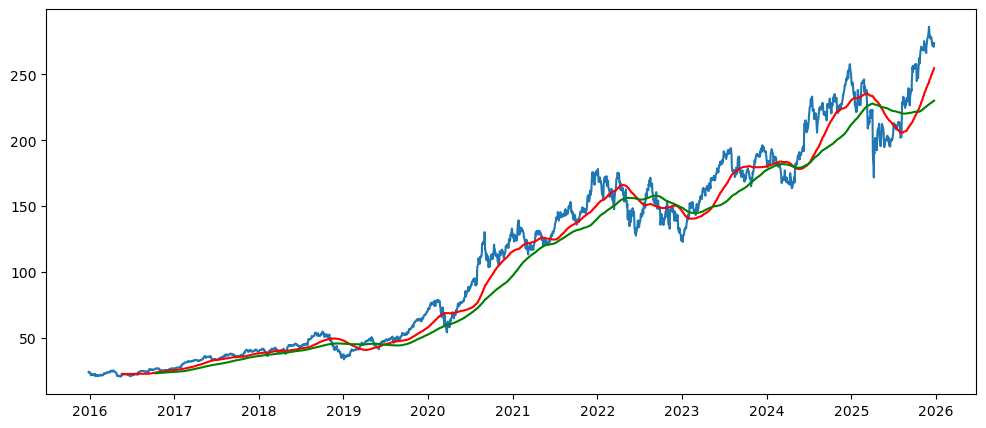

In [64]:
df['MA_200'] = df.Close.rolling(201).mean()
df['MA_200']
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r') # 'r' for red color
plt.plot(df['MA_200'], 'g') # 'r' for red color

###Calculating % changed in each trading session

In [65]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]
df

Price,Close,High,Low,Open,Volume,MA_100,MA_200,Percentage Changed
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2015-12-28,24.084593,24.280751,23.940293,24.258203,106816800,NaN,NaN,NaN
2015-12-29,24.517496,24.673070,24.093615,24.116162,123724800,NaN,NaN,0.017974
2015-12-30,24.197327,24.508473,24.165761,24.481418,100855200,NaN,NaN,-0.013059
2015-12-31,23.732862,24.131942,23.633656,24.127433,163649200,NaN,NaN,-0.019195
2016-01-04,23.753162,23.757673,22.997841,23.135378,270597600,NaN,NaN,0.000855
...,...,...,...,...,...,...,...,...
2025-12-18,272.190002,273.630005,266.950012,273.609985,51630700,252.056360,229.373160,0.001288
2025-12-19,273.670013,274.600006,269.899994,272.149994,144632000,252.706953,229.565864,0.005437


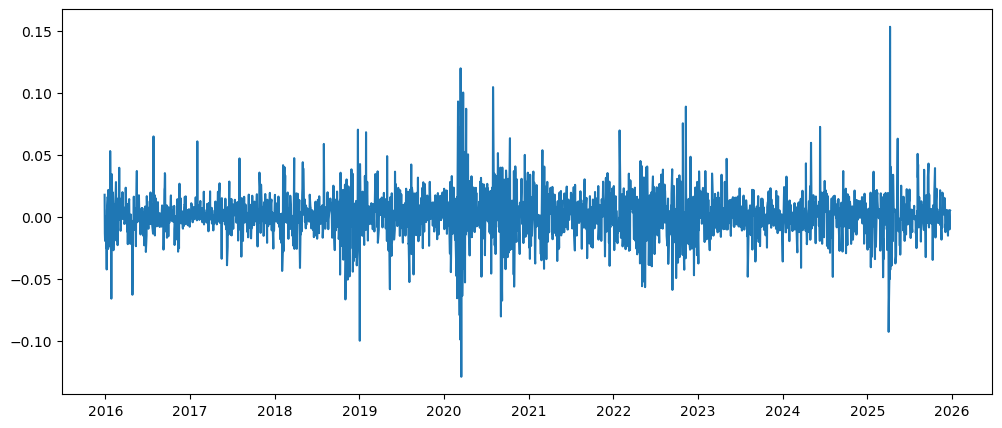

In [66]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed'])

4. Data Preprocessing

In [67]:
# Splitting data into Training and Testing
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1759, 1)
(755, 1)


In [68]:
# Scaling down the data between 0 and 1
# For the LSTM models, we have to scale down the data, we cannot just provide this data as it is,
# we need to kind of normalize the data between 0 and 1

In [69]:

scaler = MinMaxScaler(feature_range=(0,1))

In [70]:
# Now we will have to fit this data to the MinMaxScaler
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02207524],
       [0.02482093],
       [0.02279025],
       ...,
       [0.70977016],
       [0.69639897],
       [0.69596173]])

In [71]:
data_training_array.shape

(1759, 1)

In [72]:
type(data_training_array)

numpy.ndarray

5. Sequence Creation

In [79]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    # print(data_training_array[i-100: i])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [78]:
# y_train

In [75]:
x_train.shape


(1659, 100, 1)

In [76]:
x_train.ndim

3

6. Model Building

In [77]:
print(tf.__version__)

2.20.0


In [80]:
from keras.layers import Dense, LSTM, Input
from keras.models import Sequential

In [81]:
# model = Sequential()
# model.add(LSTM(units=50, activation='relu', return_sequences=True, 
#               input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))


# model.add(LSTM(units=60, activation='relu', return_sequences=True))
# model.add(Dropout(0.3))


# model.add(LSTM(units=80, activation='relu', return_sequences=True))
# model.add(Dropout(0.4))


# model.add(LSTM(units=120, activation='relu'))
# model.add(Dropout(0.5))


# model.add(Dense(units=1))

In [82]:
model = Sequential()

# Input layer defines the shape of the data the model will receive
# (100, 1) means each input sample is a sequence of 100 time steps, 
# with 1 feature at each time step (e.g., stock closing price)
model.add(Input(shape=(100, 1)))

# First LSTM layer with 128 units, tanh activation function. Tann means Hyperbolic Tangent, this helps the network handle
# both positive and negative values, which is important when you're trying to capture patterns in sequential data.
# We also set return_sequences=True because we want this layer to return the full sequence to the next LSTM layer.
# For example, if you have a sequence of 100 time steps, and you set return_sequences=True, the LSTM layer will produce 
# an output for each of those 100 steps
model.add(LSTM(units=128, activation='tanh', return_sequences=True))

# No return_sequences means this layer outputs a single value summarizing the sequence
# Now at this point, we got the single value summarizing the sequence of output that was generated in the previous layer
model.add(LSTM(units=64))

# A Dense layer is a fully connected layer, meaning that each neuron in the layer is connected to every neuron in the previous layer. 
# These layers are typically used at the end of a neural network to transform the learned features into the final output.
model.add(Dense(25))
model.add(Dense(1))

7. Model Training

In [83]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0083
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 5.9791e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 6.0794e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 5.6584e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 5.4989e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 5.3100e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 5.8245e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 5.1249e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 5.4049e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 6.4869e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 4.9715e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 4.3930e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.9914e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.3069e-04
Epoch 15/50
52/52 ━

In [85]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [113]:
model.save('keras_model.keras')

8. Preparing Test Data

In [86]:
data_training.tail(100)
data_testing
data_training.tail(100)

Ticker,AAPL
Date,
2022-08-01,158.625793
2022-08-02,157.152573
2022-08-03,163.163254
2022-08-04,162.848969
2022-08-05,162.622787
...,...
2022-12-14,141.081619
2022-12-15,134.471313
2022-12-16,132.510895


In [89]:
past_100_days = data_training.tail(100)
type(past_100_days)
# pd.core.frame.DataFrame
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

Ticker,AAPL
0,158.625793
1,157.152573
2,163.163254
3,162.848969
4,162.622787


In [91]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(855, 1)

In [92]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [93]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [94]:
x_test.ndim

3

9. Making Predictions

In [95]:
# Making Predictions
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [96]:
y_predicted.shape

(755, 1)

In [97]:
y_test

array([6.30260159e-02, 4.35682311e-02, 4.13325949e-02, 3.02743105e-02,
       6.16358332e-03, 2.77362653e-02, 2.96699605e-02, 3.02174977e-04,
       8.09727853e-03, 0.00000000e+00, 2.77967284e-02, 3.09992122e-02,
       3.45041050e-02, 5.11821795e-02, 5.06987556e-02, 5.88564037e-02,
       6.59869282e-02, 6.15758381e-02, 6.19383357e-02, 7.76492818e-02,
       9.72279927e-02, 1.05808695e-01, 1.01759915e-01, 1.14449767e-01,
       1.26353879e-01, 1.08648681e-01, 1.16443832e-01, 1.23332597e-01,
       1.55903007e-01, 1.78140409e-01, 1.61401777e-01, 1.79046606e-01,
       1.62550108e-01, 1.56205229e-01, 1.58444422e-01, 1.75632033e-01,
       1.71698190e-01, 1.84589086e-01, 1.74784708e-01, 1.67764440e-01,
       1.43132850e-01, 1.45735289e-01, 1.48700694e-01, 1.32420965e-01,
       1.39743736e-01, 1.36657218e-01, 1.23948179e-01, 1.27579520e-01,
       1.58565441e-01, 1.75511014e-01, 1.62015206e-01, 1.69701130e-01,
       1.55902446e-01, 1.43254057e-01, 1.55176327e-01, 1.68006573e-01,
      

In [98]:
y_predicted


array([[0.06042619],
       [0.05978696],
       [0.05633731],
       [0.05247488],
       [0.04635715],
       [0.03444202],
       [0.0304984 ],
       [0.03047865],
       [0.02315798],
       [0.01797507],
       [0.01262858],
       [0.01642368],
       [0.02278684],
       [0.02897826],
       [0.03811174],
       [0.04523642],
       [0.05203682],
       [0.05883452],
       [0.06222071],
       [0.06376955],
       [0.06919315],
       [0.08015824],
       [0.09200089],
       [0.09905747],
       [0.10676552],
       [0.11607429],
       [0.11688701],
       [0.1180033 ],
       [0.12112273],
       [0.13476157],
       [0.15426955],
       [0.1626254 ],
       [0.17182143],
       [0.1718911 ],
       [0.16771099],
       [0.16487269],
       [0.169491  ],
       [0.17283814],
       [0.17953588],
       [0.18105373],
       [0.17843735],
       [0.1670976 ],
       [0.15889795],
       [0.15525301],
       [0.14835237],
       [0.14573084],
       [0.14391352],
       [0.138

In [99]:
# scale_factor = 1/scaler.scale_
# y_predicted = y_predicted * scale_factor
# y_test = y_test * scale_factor

In [100]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [101]:
print(y_predicted)

[133.0131   132.90889  132.3465   131.71681  130.71945  128.77695
 128.13403  128.13081  126.93734  126.092384 125.22075  125.83946
 126.87684  127.886215 129.37523  130.53674  131.6454   132.75362
 133.30566  133.55817  134.44237  136.22998  138.16068  139.3111
 140.56772  142.08531  142.2178   142.3998   142.90834  145.13185
 148.31221  149.67445  151.17366  151.18501  150.50354  150.04082
 150.79373  151.33942  152.43132  152.67879  152.25224  150.40355
 149.06676  148.47253  147.34755  146.92017  146.62389  145.75974
 145.2589   146.72266  149.12001  150.12427  150.89426  150.50581
 149.26653  148.94958  149.6827   150.555    152.1856   153.10287
 154.40811  156.00177  156.53     157.04749  157.84984  157.67491
 157.14732  157.90912  159.2581   161.21837  163.0593   163.94897
 163.55737  163.41158  162.33035  161.04198  159.95674  161.43234
 162.73625  163.54749  164.42723  165.41335  165.62111  164.94151
 164.4761   163.61267  163.02634  164.55751  166.42073  167.59935
 167.7435  

In [102]:
print(y_test)

[133.43695068 130.26478577 129.90031433 128.09750366 124.16677856
 127.68373108 127.99897766 123.21120453 124.48202515 123.16194153
 127.69358826 128.21568298 128.78707886 131.506073   131.42726135
 132.75718689 133.91966248 133.20053101 133.2596283  135.82095337
 139.01283264 140.41172791 139.75166321 141.82046509 143.76116943
 140.87472534 142.14555359 143.26861572 148.57850647 152.2038269
 149.47496033 152.3515625  149.66217041 148.6277771  148.99282837
 151.79489136 151.15356445 153.25514221 151.65675354 150.51225281
 146.49661255 146.92088318 147.40432739 144.75027466 145.9440918
 145.44090271 143.36897278 143.96098328 149.01255798 151.77516174
 149.57496643 150.82798767 148.57841492 146.51637268 148.46003723
 150.55172729 150.94638062 153.76818848 152.92953491 155.29747009
 157.15235901 155.72172546 156.80702209 158.10939026 156.16572571
 155.54411316 158.6224823  160.19120789 162.69726562 163.95031738
 163.4175415  161.57249451 162.460495   159.86560059 158.65205383
 157.9614105

In [103]:
y_predicted.shape

(755,)

In [104]:
y_test.shape


(755,)

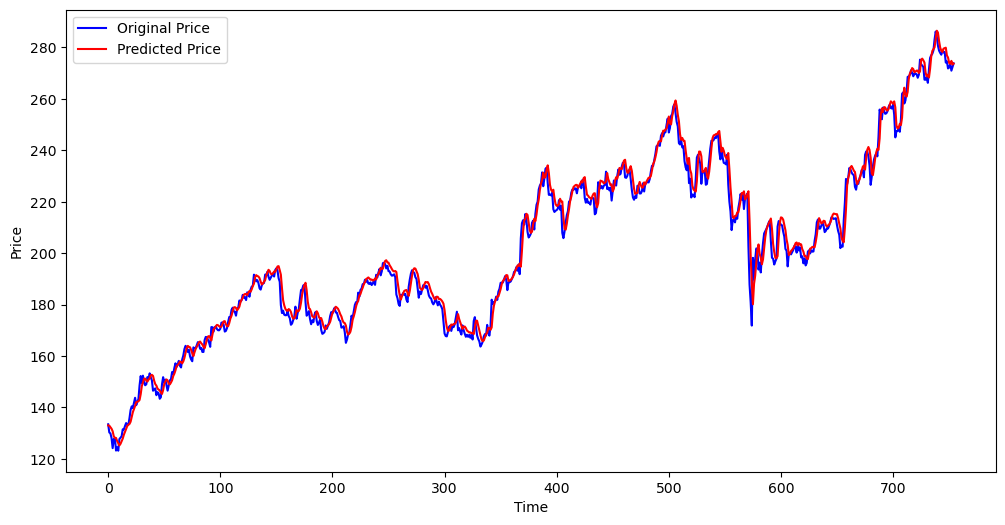

In [105]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
# plt.xlim(500, 700)
# plt.ylim(10, 25)
plt.show()

In [106]:
# MSE
mse = np.mean((y_test - y_predicted) ** 2)
mse

np.float64(15.220948901986517)

In [107]:
# RMSE
rmse = np.sqrt(mse)
rmse

np.float64(3.9014034528598187)

In [108]:
# R-Squared
# Calculate SSR (Sum of Squared Residuals)
ssr = np.sum((y_test - y_predicted) ** 2)

# Calculate SST (Total Sum of Squares)
sst = np.sum((y_test - np.mean(y_test)) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)
r_squared

np.float64(0.9873225646814365)

In [109]:
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 15.220948901986517


In [111]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.9014034528598187


In [112]:
r2 = r2_score(y_test, y_predicted)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.9873225646814365
